In [3]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import surface
from nilearn import datasets
from copy import deepcopy
from nilearn._utils.glm import z_score
import scipy.stats as sps

from nilearn.glm import threshold_stats_img
from nilearn.plotting import plot_stat_map


/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [4]:
#from https://github.com/neuroscout/neuroscout-paper/blob/master/book/utils.py
def t_to_z(t_map, dof):
    # From nilearn.glm
    old_shape = t_map.get_fdata().shape
    data = t_map.get_fdata().flatten()
    new_img = deepcopy(t_map)
    baseline = 0
    p_value = sps.t.sf(data, dof)
    
    one_minus_pvalues = sps.t.cdf(data, dof)
        
    # Avoid inf values kindly supplied by scipy.
    z_scores = z_score(p_value, one_minus_pvalue=one_minus_pvalues)
    
    z_scores = z_scores.reshape(old_shape)
    
    new_img.get_fdata()[:] = z_scores
    
    return new_img

In [2]:
texture = surface.vol_to_surf(stat_img, fsaverage.pial_right)

NameError: name 'stat_img' is not defined

In [3]:
plotting.plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere', colorbar=True,
                            threshold=1., bg_map=fsaverage.sulc_right)

NameError: name 'fsaverage' is not defined

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/plotting/surf_plotting.py:214: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure, rect=[0, 0, 1, 1],


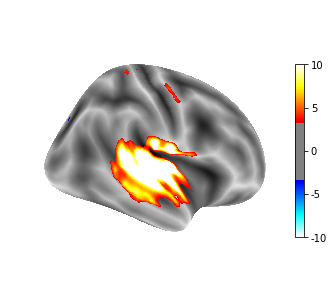

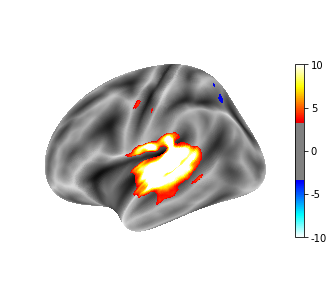

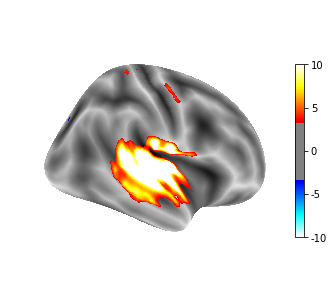

In [8]:
#brain_img = '/om/user/jsmentch/speech perception_association-test_z_FDR_0.01.nii.gz'
brain_img = '/om/user/jsmentch/loudness.nii.gz'
fsaverage = datasets.fetch_surf_fsaverage()
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')


# load the file brain.nii.gz
img = nib.load(brain_img)
img_surf_l = surface.vol_to_surf(brain_img, fsaverage.pial_left)
img_surf_r = surface.vol_to_surf(brain_img, fsaverage.pial_right)

big_img_surf_l = surface.vol_to_surf(brain_img, big_fsaverage.pial_left)
big_img_surf_r = surface.vol_to_surf(brain_img, big_fsaverage.pial_right)


#plot small fast
# plotting.plot_surf_stat_map(fsaverage.infl_left, img_surf_l,
#                             hemi='left',
#                             colorbar=True,
#                             view='lateral',threshold=1,bg_map=fsaverage.sulc_left,
#                             cmap='cold_hot')

# plotting.plot_surf_stat_map(fsaverage.infl_right, img_surf_r,
#                             hemi='right',
#                             colorbar=True,
#                             view='lateral',threshold=1,bg_map=fsaverage.sulc_right,
#                             cmap='cold_hot')





# #plot the BIG surface with nilearn (slow)
plotting.plot_surf_stat_map(big_fsaverage.infl_left, big_img_surf_l,
                            hemi='left',
                            colorbar=True,
                            view='lateral',threshold=3.3,vmax=10,bg_map=big_fsaverage.sulc_left,
                            cmap='cold_hot')

plotting.plot_surf_stat_map(big_fsaverage.infl_right, big_img_surf_r,
                            hemi='right',
                            colorbar=True,
                            view='lateral',threshold=3.3,vmax=10,bg_map=big_fsaverage.sulc_right,
                            cmap='cold_hot')

#plot the BIG surface with nilearn (slow)
# plotting.plot_surf_stat_map(big_fsaverage.infl_left, big_img_surf_l,
#                             hemi='left',
#                             colorbar=True,
#                             view='ventral',threshold=3.3,vmax=10,bg_map=big_fsaverage.sulc_left,
#                             cmap='cold_hot')

# plotting.plot_surf_stat_map(big_fsaverage.infl_right, big_img_surf_r,
#                             hemi='right',
#                             colorbar=True,
#                             view='ventral',threshold=3.3,vmax=10,bg_map=big_fsaverage.sulc_right,
#                             cmap='cold_hot')

In [3]:
brain_img = '/om2/user/jsmentch/projects/speech_face_analysis/data/fitlins_cifti/fitlins/task-MerlinMovie_space-fsLR_contrast-speech_stat-z_statmap.dscalar.nii'

In [47]:
import hcp_utils as hcp
img = nib.load(brain_img)
X = img.get_fdata()
X.shape     # e.g. (700, 91282)


(1, 91282)

In [50]:
pos = hcp.cortex_data(X[0])
pos[pos<0] = 0

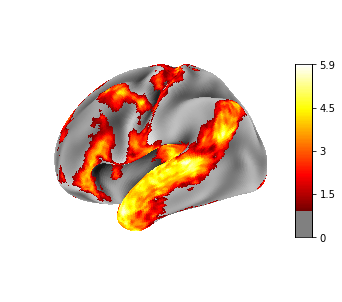

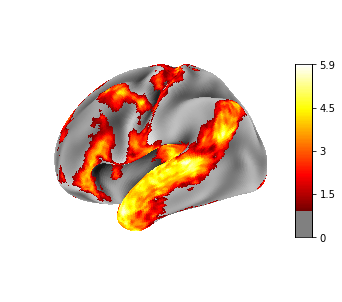

In [51]:
plotting.plot_surf_stat_map(hcp.mesh.inflated, pos,
                            hemi='left',
                            colorbar=True,
                            view='lateral',threshold=1,bg_map=hcp.mesh.sulc,
                            cmap='cold_hot')

In [5]:
plotting.view_img_on_surf(brain_img, threshold=1)
# view.open_in_browser()

NameError: name 'plotting' is not defined

## plot neuroscout outputs 4/8/22

In [25]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[-10], vmax=15, annotate=False)
plot_args = dict(display_mode='z', cut_coords=[-22], vmax=15, annotate=False)

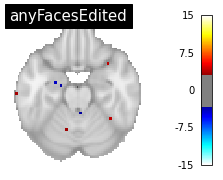

In [26]:
fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-f9uii/fitlins/'
#fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-8ga7c/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-anyFacesEdited_stat-t_statmap.nii.gz'
#brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-speechEdited_stat-t_statmap.nii.gz'

t_map = nib.load(brain_img)

n_subjects = 18
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)

# Plot
plot_stat_map(thresh_z_map, threshold=thresh, **plot_args, title=f"anyFacesEdited")



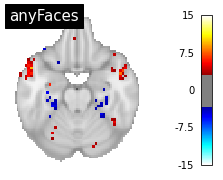

In [27]:
fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-8ga7c/fitlins/'
#fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-8ga7c/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-anyFaces_stat-t_statmap.nii.gz'
#brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-speechEdited_stat-t_statmap.nii.gz'

t_map = nib.load(brain_img)

n_subjects = 18
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)

# Plot
plot_stat_map(thresh_z_map, threshold=thresh, **plot_args, title=f"anyFaces")



## plot neuroscout outputs 4/14/22

In [11]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[-10], vmax=15, annotate=False)
plot_args = dict(display_mode='z', cut_coords=[-6], vmax=15, annotate=False)

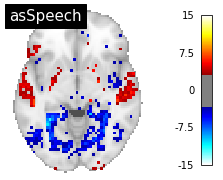

In [12]:
#asSpeech
fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-gbns6/fitlins/'
#fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-8ga7c/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-asSpeech_stat-t_statmap.nii.gz'
#brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-speechEdited_stat-t_statmap.nii.gz'

t_map = nib.load(brain_img)

n_subjects = 18
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)

# Plot
plot_stat_map(thresh_z_map, threshold=thresh, **plot_args, title=f"asSpeech")



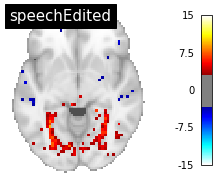

In [17]:
#speechEdited
fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-ahvcg/fitlins/'
#fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-8ga7c/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-speechEdited_stat-t_statmap.nii.gz'
#brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-speechEdited_stat-t_statmap.nii.gz'

t_map = nib.load(brain_img)

n_subjects = 18
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)

# Plot
plot_stat_map(thresh_z_map, threshold=thresh, **plot_args, title=f"speechEdited")



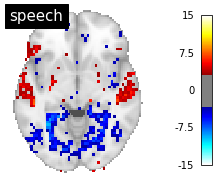

In [18]:
#speech
fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-r2gtf/fitlins/'
#fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-8ga7c/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-speech_stat-t_statmap.nii.gz'
#brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-speechEdited_stat-t_statmap.nii.gz'

t_map = nib.load(brain_img)

n_subjects = 18
z_map = t_to_z(t_map, n_subjects-1)
thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)

# Plot
plot_stat_map(thresh_z_map, threshold=thresh, **plot_args, title=f"speech")



/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/plotting/surf_plotting.py:214: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure, rect=[0, 0, 1, 1],


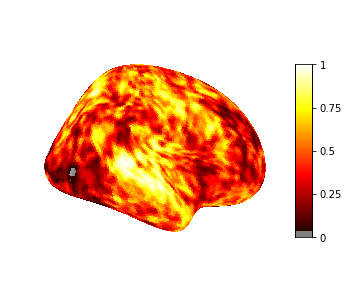

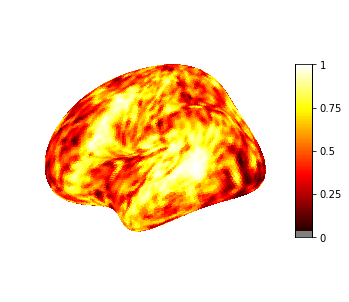

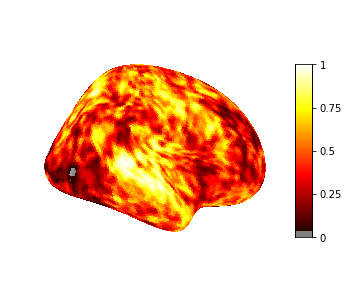

In [15]:
fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-f9uii/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-anyFacesEdited_stat-p_statmap.nii.gz'

#brain_img = '/om/user/jsmentch/speech perception_association-test_z_FDR_0.01.nii.gz'
#brain_img = '/om2/scratch/jsmentch/loudness.nii.gz'
fsaverage = datasets.fetch_surf_fsaverage()
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')


# load the file brain.nii.gz
img = nib.load(brain_img)
img_surf_l = surface.vol_to_surf(brain_img, fsaverage.pial_left)
img_surf_r = surface.vol_to_surf(brain_img, fsaverage.pial_right)

big_img_surf_l = surface.vol_to_surf(brain_img, big_fsaverage.pial_left)
big_img_surf_r = surface.vol_to_surf(brain_img, big_fsaverage.pial_right)


##plot small fast
plotting.plot_surf_stat_map(fsaverage.infl_left, img_surf_l,
                            hemi='left',
                            colorbar=True,
                            view='lateral',threshold=0.05,bg_map=fsaverage.sulc_left,
                            cmap='cold_hot')

plotting.plot_surf_stat_map(fsaverage.infl_right, img_surf_r,
                            hemi='right',
                            colorbar=True,
                            view='lateral',threshold=0.05,bg_map=fsaverage.sulc_right,
                            cmap='cold_hot')





# # #plot the BIG surface with nilearn (slow)
# plotting.plot_surf_stat_map(big_fsaverage.infl_left, big_img_surf_l,
#                             hemi='left',
#                             colorbar=True,
#                             view='lateral',bg_map=big_fsaverage.sulc_left,
#                             cmap='cold_hot')

# plotting.plot_surf_stat_map(big_fsaverage.infl_right, big_img_surf_r,
#                             hemi='right',
#                             colorbar=True,
#                             view='lateral',bg_map=big_fsaverage.sulc_right,
#                             cmap='cold_hot')

#plot the BIG surface with nilearn (slow)
# plotting.plot_surf_stat_map(big_fsaverage.infl_left, big_img_surf_l,
#                             hemi='left',
#                             colorbar=True,
#                             view='ventral',threshold=3.3,vmax=10,bg_map=big_fsaverage.sulc_left,
#                             cmap='cold_hot')

# plotting.plot_surf_stat_map(big_fsaverage.infl_right, big_img_surf_r,
#                             hemi='right',
#                             colorbar=True,
#                             view='ventral',threshold=3.3,vmax=10,bg_map=big_fsaverage.sulc_right,
#                             cmap='cold_hot')

In [ ]:
fitlins_dir='/om2/scratch/Mon/jsmentch/feature_viz_paper/outputs/neuroscout-f9uii/fitlins/'
brain_img=f'{fitlins_dir}level-dataset_name-dataset_contrast-anyFacesEdited_stat-p_statmap.nii.gz'

#brain_img = '/om/user/jsmentch/speech perception_association-test_z_FDR_0.01.nii.gz'
#brain_img = '/om2/scratch/jsmentch/loudness.nii.gz'
fsaverage = datasets.fetch_surf_fsaverage()
big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')


# load the file brain.nii.gz
img = nib.load(brain_img)
img_surf_l = surface.vol_to_surf(brain_img, fsaverage.pial_left)
img_surf_r = surface.vol_to_surf(brain_img, fsaverage.pial_right)

big_img_surf_l = surface.vol_to_surf(brain_img, big_fsaverage.pial_left)
big_img_surf_r = surface.vol_to_surf(brain_img, big_fsaverage.pial_right)


##plot small fast
plotting.plot_surf_stat_map(fsaverage.infl_left, img_surf_l,
                            hemi='left',
                            colorbar=True,
                            view='lateral',threshold=0.05,bg_map=fsaverage.sulc_left,
                            cmap='cold_hot')

plotting.plot_surf_stat_map(fsaverage.infl_right, img_surf_r,
                            hemi='right',
                            colorbar=True,
                            view='lateral',threshold=0.05,bg_map=fsaverage.sulc_right,
                            cmap='cold_hot')





# # #plot the BIG surface with nilearn (slow)
# plotting.plot_surf_stat_map(big_fsaverage.infl_left, big_img_surf_l,
#                             hemi='left',
#                             colorbar=True,
#                             view='lateral',bg_map=big_fsaverage.sulc_left,
#                             cmap='cold_hot')

# plotting.plot_surf_stat_map(big_fsaverage.infl_right, big_img_surf_r,
#                             hemi='right',
#                             colorbar=True,
#                             view='lateral',bg_map=big_fsaverage.sulc_right,
#                             cmap='cold_hot')

#plot the BIG surface with nilearn (slow)
# plotting.plot_surf_stat_map(big_fsaverage.infl_left, big_img_surf_l,
#                             hemi='left',
#                             colorbar=True,
#                             view='ventral',threshold=3.3,vmax=10,bg_map=big_fsaverage.sulc_left,
#                             cmap='cold_hot')

# plotting.plot_surf_stat_map(big_fsaverage.infl_right, big_img_surf_r,
#                             hemi='right',
#                             colorbar=True,
#                             view='ventral',threshold=3.3,vmax=10,bg_map=big_fsaverage.sulc_right,
#                             cmap='cold_hot')